In [35]:
import sys
sys.path.append(r"C:\cs229-journey\cs229-journey")

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import problem_sets.PS1.src.util as util

from problem_sets.PS1.src.linear_model import LinearModel

In [37]:
ds3_training_set_path = 'data/ds3_train.csv'
ds3_valid_set_path = 'data/ds3_valid.csv'
ds3_test_set_path = 'data/ds3_test.csv'

In [38]:
x_train, y_train = util.load_dataset('data/ds3_train.csv', add_intercept=True)
_, t_train = util.load_dataset('data/ds3_train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('data/ds3_valid.csv', label_col='t')
x_test, y_test = util.load_dataset('data/ds3_test.csv', add_intercept=True)
_, t_test = util.load_dataset('data/ds3_test.csv', label_col='t')

We have a look to the data

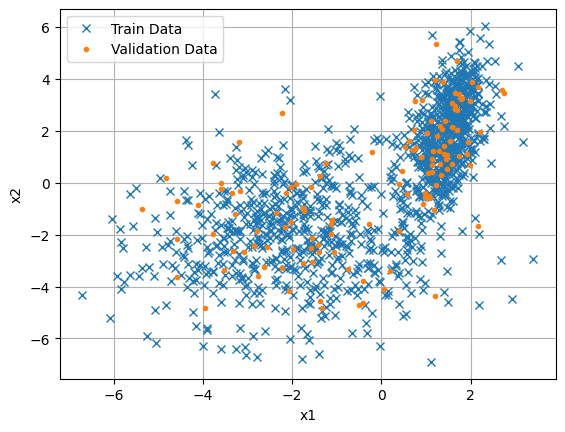

In [39]:
plt.plot(x_train[:,1], x_train[:,2], "x", label = "Train Data")
plt.plot(x_test[:,1], x_test[:,2], ".", label = "Validation Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()

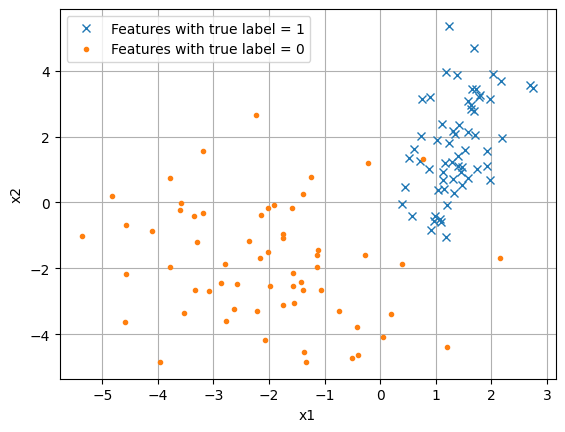

In [40]:
plt.plot(x_test[:,1][t_test == 1], x_test[:,2][t_test == 1], "x", label = "Features with true label = 1")
plt.plot(x_test[:,1][t_test == 0], x_test[:,2][t_test == 0], ".", label = "Features with true label = 0")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()

As we see given

 c) First we will consider the ideal case, where we have access to the true t-labels for training.
 In src/p02cde_posonly, write a logistic regression classi er that uses $x_1$ and $x_2$ as input
 features, and train it using the t-labels (you can ignore the y-labels for this part). Output
 the trained models predictions on the test set to the le specified in the code.

In [41]:
#We use the logistic regression model we made before
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """
        def sigmoid(theta):
            return 1/(1+np.exp(-np.dot(x, theta)))
        
        def gradient_loss(theta):
            return -np.dot(x.T, (y - sigmoid(theta)))/m
        
        def hessian(theta):
            h_theta_x = np.reshape(sigmoid(theta), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)
        
        def newton_step(H, gradient, theta):
            return theta - np.dot(np.linalg.inv(H), gradient)
        
        m, n = x.shape

        self.theta = np.zeros(n)
        while True:
            theta = np.copy(self.theta)
            gradient = gradient_loss(theta)
            H = hessian(theta)
            self.theta = newton_step(H, gradient, theta)
            if np.linalg.norm(self.theta - theta) < self.eps:
                break


    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """
        probs = 1/(1+np.exp(-np.dot(x, self.theta)))
        return probs

In [42]:
model = LogisticRegression(eps = 1e-5)
model.fit(x_train, t_train)

The accuracy over the train set has been 96.32%


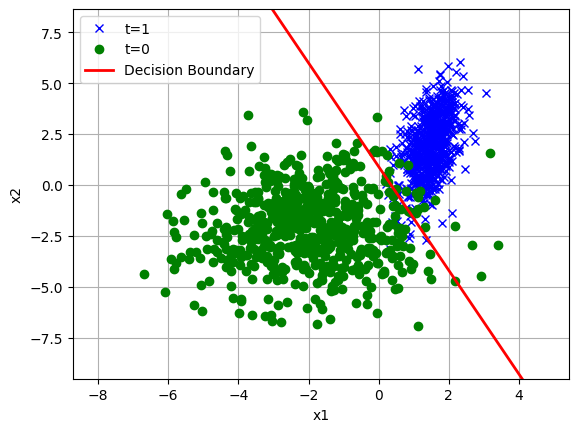

In [43]:
accuracy_train = np.mean((model.predict(x_train) > 0.5) == t_train)
print(f"The accuracy over the train set has been {accuracy_train:.2%}")
util.plot(x_train, t_train, theta=model.theta)
plt.legend(("t=1", "t=0", "Decision Boundary"))
plt.grid()

The accuracy over the test set has been 98.39%


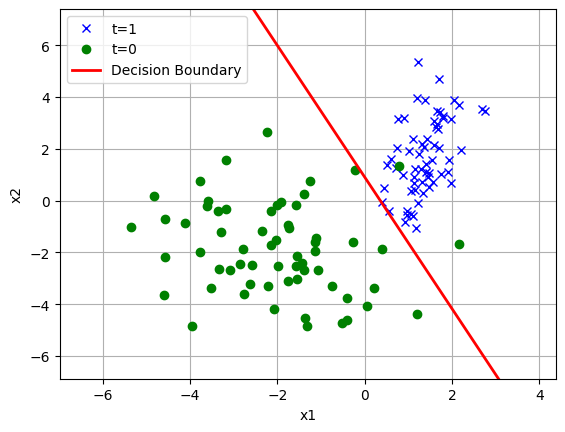

In [44]:
accuracy_test = np.mean((model.predict(x_test) > 0.5) == t_test)
print(f"The accuracy over the test set has been {accuracy_test:.2%}")
util.plot(x_test, t_test, theta=model.theta)
plt.legend(("t=1", "t=0", "Decision Boundary"))
plt.grid()

(d) We now consider the case where the t-labels are unavail
able, so you only have access to the y-labels at training time. Add to your code in
 p02cde_posonly.py to re-train the classi er (still using $x_1$ and $x_2$ as input features), but
 using the y-labels only.

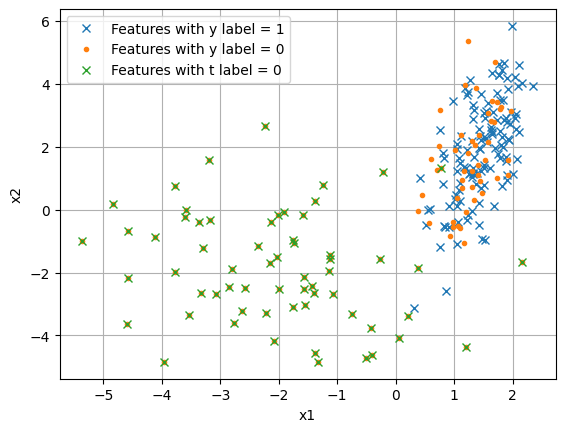

In [45]:
plt.plot(x_train[:, 1][y_train == 1], x_train[:, 2][y_train == 1], "x", label = "Features with y label = 1")
plt.plot(x_test[:, 1][y_test == 0], x_test[:, 2][y_test == 0], ".", label = "Features with y label = 0")
plt.plot(x_test[:, 1][t_test == 0], x_test[:, 2][t_test == 0], "x", label = "Features with t label = 0")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()

In [46]:
model.fit(x_train, y_train)

The accuracy over the train set has been 50.00%


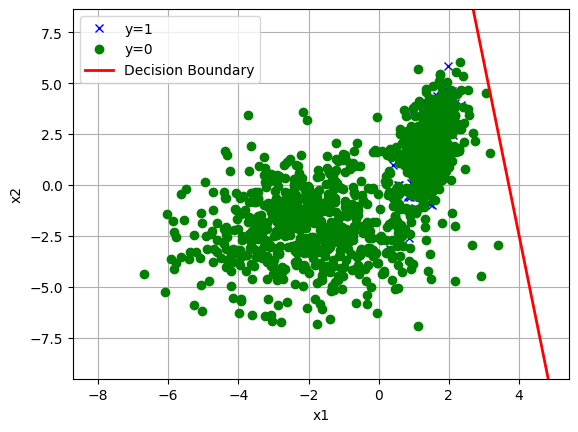

In [47]:
accuracy_train = np.mean((model.predict(x_train) > 0.5) == t_train)
print(f"The accuracy over the train set has been {accuracy_train:.2%}")
util.plot(x_train, y_train, theta=model.theta)
plt.legend(("y=1", "y=0", "Decision Boundary"))
plt.grid()

The accuracy over the test set has been 50.00%


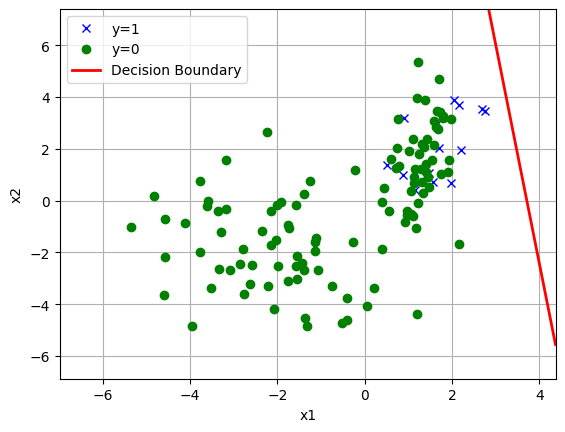

In [48]:
accuracy_test = np.mean((model.predict(x_test) > 0.5) == t_test)
print(f"The accuracy over the test set has been {accuracy_test:.2%}")
util.plot(x_test, y_test, theta=model.theta)
plt.legend(("y=1", "y=0", "Decision Boundary"))
plt.grid()

(e) Using the validation set, estimate the constant $\alpha$ by averaging your classier's predictions over all labeled examples in the validation set:
$$
\alpha \approx \dfrac{1}{|V_{+}|}\sum_{x^{(i)} \in V_{+}}h(x^{(i)})
$$
Add code in src/p02cde_posonly.py to rescale your classifer's predictions from part (d)
using the estimated value for $\alpha$.

Finally, using a threshold of $p(t^{(i)} = 1| x^{(i)}) = 0.5$, make three separate plots with the
decision boundaries from parts (c)- (e) plotted on top of the test set. Plot $x_1$ on the
horizontal axis and $x_2$ on the vertical axis, and use two different symbols for the positive
$(t^{(i)} = 1)$ and negative $(t^{(i)} = 0)$ examples. In each plot, indicate the separating hyperplane
with a red line

In [49]:
#We compute alpha
set_V = x_valid[y_valid == 1]
alpha = sum(model.predict(set_V))/len(set_V)

The accuracy over the train set has been 96.16%


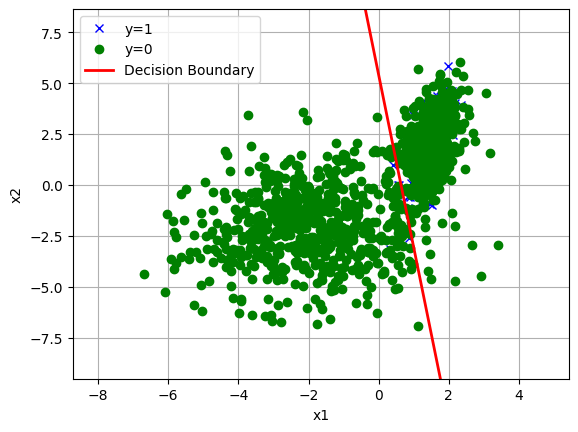

In [50]:
#we scale our prediction by alpha
accuracy_train = np.mean((model.predict(x_train)/alpha> 0.5) == t_train)
print(f"The accuracy over the train set has been {accuracy_train:.2%}")
util.plot(x_train, y_train, theta=model.theta, correction=alpha)
plt.legend(("y=1", "y=0", "Decision Boundary"))
plt.grid()

The accuracy over the test set has been 95.16%


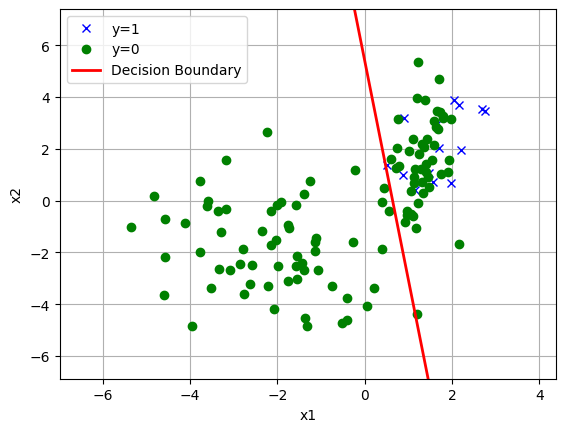

In [51]:
accuracy_test = np.mean((model.predict(x_test)/alpha > 0.5) == t_test)
print(f"The accuracy over the test set has been {accuracy_test:.2%}")
util.plot(x_test, y_test, theta=model.theta, correction=alpha)
plt.legend(("y=1", "y=0", "Decision Boundary"))
plt.grid()

We see that the model now obtains an accuracy almost as good as the model trained with the true labels.